# Model Training for Water Potability

The main objective is to use the given dataset and then predict whether the given sample of water is fit for drinking or not. This measure of drinking is called potability of water .

## Importing modules

In [22]:
#Importing basic modules
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
#Importing modelling
from sklearn.metrics import (precision_score, recall_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier



## Loading the dataset 

Load the dataset as a dataframe

In [23]:
df = pd.read_csv('data/water_potability_cleaned.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Preparing the X and Y variables

Now we'll divide the dataset into our independent and dependent variables (X and Y respectively).

In [24]:
X = df.drop(columns= ['Potability'], axis= 1)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [25]:
y = df['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

## Preprocessing of data

Since in this case, there are only numeric features for X, we'll only do numeric transformation.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

features = X.select_dtypes(exclude= 'object').columns

transformer = StandardScaler()

preprocessor = ColumnTransformer([("StandardScaler", transformer, features)])

In [27]:
X = preprocessor.fit_transform(X)

In [30]:
X.shape

(3276, 9)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
X_train.shape, X_test.shape

((2620, 9), (656, 9))

## Creating a model evaluator 

This model evaluator gives all the evaluation metrics of the models after training which in this case are :
- Precision
- Recall
- F1 score

In [34]:
def model_evaluator(true, pred):
    pre = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)

    return pre, recall, f1 

## Training the models 

Now time to train all the models individually

In [41]:
models = {

    "Logistic Regression": LogisticRegression(class_weight= 'balanced'),
    "Naive Bayes": GaussianNB(),
    "K nearest Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    
}

model_list = []
precision_list = []
recall_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_precision, model_train_recall, model_train_f1 = model_evaluator(y_train, y_train_pred)
    model_test_precision, model_test_recall, model_test_f1 = model_evaluator(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model performance for Training set')
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score {:.4f}".format(model_train_f1))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 score: {:.4f}".format(model_test_f1))
    precision_list.append(model_test_precision)
    recall_list.append(model_test_recall)
    f1_list.append(model_test_f1)
    
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Precision: 0.4250
- Recall: 0.5269
- F1 Score 0.4705
----------------------------------
Model performance for Test set
- Precision: 0.3750
- Recall: 0.4669
- F1 score: 0.4159


Naive Bayes
Model performance for Training set
- Precision: 0.5568
- Recall: 0.2400
- F1 Score 0.3354
----------------------------------
Model performance for Test set
- Precision: 0.5326
- Recall: 0.1907
- F1 score: 0.2808


K nearest Classifier
Model performance for Training set
- Precision: 0.7338
- Recall: 0.5671
- F1 Score 0.6398
----------------------------------
Model performance for Test set
- Precision: 0.5525
- Recall: 0.3891
- F1 score: 0.4566


Decision Tree Classifier
Model performance for Training set
- Precision: 1.0000
- Recall: 1.0000
- F1 Score 1.0000
----------------------------------
Model performance for Test set
- Precision: 0.4538
- Recall: 0.4202
- F1 score: 0.4364


Random Forest Classifier
Model performance for Training set
- Prec

## Checking the best model of them all

We are going to compare all the given models according to their precision, recall and their F1 scores respectively.

In [42]:
pd.DataFrame(list(zip(model_list, precision_list)), columns=['Model Name', 'Precision']).sort_values(by=["Precision"],ascending = False)

,Model Name,Precision
4,Random Forest Classifier,0.666667
5,Gradient Boosting Classifier,0.619048
6,XGBoost Classifier,0.576271
2,K nearest Classifier,0.552486
1,Naive Bayes,0.532609
3,Decision Tree Classifier,0.453782
0,Logistic Regression,0.375000


In [43]:
pd.DataFrame(list(zip(model_list, recall_list)), columns=['Model Name', 'Recall']).sort_values(by=["Recall"],ascending = False)

,Model Name,Recall
0,Logistic Regression,0.466926
3,Decision Tree Classifier,0.420233
6,XGBoost Classifier,0.396887
2,K nearest Classifier,0.389105
4,Random Forest Classifier,0.342412
5,Gradient Boosting Classifier,0.202335
1,Naive Bayes,0.190661


In [44]:
pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1 Score']).sort_values(by=["F1 Score"],ascending = False)

,Model Name,F1 Score
6,XGBoost Classifier,0.470046
2,K nearest Classifier,0.456621
4,Random Forest Classifier,0.452442
3,Decision Tree Classifier,0.436364
0,Logistic Regression,0.415945
5,Gradient Boosting Classifier,0.304985
1,Naive Bayes,0.280802


### The best metric changes according to the given metric.

### Since the dataset was a bit imbalanced, we'll take precision as the deciding metric for the best model.

### Hence in this case, the Random Forest Classifier can be said to be the best among the models.

## Checking the Random Forest Classifier

In [46]:
rand_model = RandomForestClassifier()
rand_model = rand_model.fit(X_train, y_train)
y_pred = rand_model.predict(X_test)
score = precision_score(y_test, y_pred)*100
print("Precision of the model is %.2f" %score)

Precision of the model is 66.67


In [48]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df

,Actual Value,Predicted Value
686,1,0
3038,0,1
2261,0,0
1547,1,0
862,0,0
...,...,...
2153,0,0
459,0,0
1963,1,0
3168,1,0


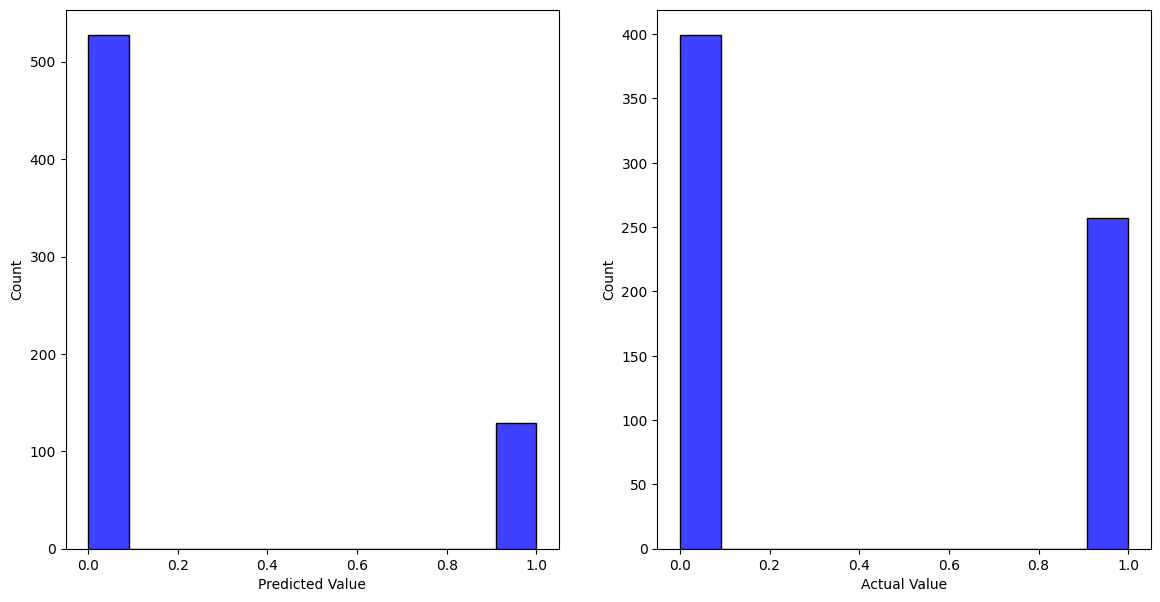

In [49]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=pred_df,x='Predicted Value',color='b')
plt.subplot(122)
sns.histplot(data=pred_df,x='Actual Value',color='b')
plt.show()